In [1]:
import numpy as np
import pandas as pd

import sys
sys.path.insert(0, '..')

from match.make_match_panel import make_match_panel
from match.make_summary_match_panel import make_summary_match_panel
from match.support.support.df import simulate_df
from match.support.support.s import simulate_s

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
n = 10

In [3]:
target = simulate_s(n, index_prefix='Sample ')

target

Sample 0    0.367457
Sample 1    0.875658
Sample 2    0.579766
Sample 3    0.742473
Sample 4    0.724835
Sample 5    0.335984
Sample 6    0.422823
Sample 7    0.617402
Sample 8    0.874753
Sample 9    0.405035
Name: Simulated Series, dtype: float64

In [4]:
features_continuous = simulate_df(
    n * 1, n, index_prefix='Feature ', column_prefix='Sample ')

features_continuous

,Sample 0,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9
Feature 0,0.068601,0.255785,0.887473,0.491769,0.235631,0.245504,0.386529,0.077322,0.196499,0.403174
Feature 1,0.316104,0.648752,0.665576,0.933196,0.013674,0.307133,0.789089,0.123165,0.316469,0.599931
Feature 2,0.405416,0.232356,0.746589,0.211184,0.498220,0.654401,0.727675,0.229064,0.679895,0.709664
Feature 3,0.948314,0.232897,0.070321,0.025168,0.522411,0.269510,0.177824,0.316154,0.190215,0.322811
Feature 4,0.789731,0.434328,0.589466,0.822111,0.529996,0.416971,0.832865,0.235539,0.632377,0.394450
Feature 5,0.438036,0.333105,0.287747,0.547883,0.007324,0.111617,0.947757,0.915246,0.322532,0.639646
Feature 6,0.683370,0.915699,0.832982,0.734061,0.738967,0.325146,0.498903,0.443654,0.308733,0.246558
Feature 7,0.506895,0.949940,0.545856,0.874357,0.708830,0.595348,0.873953,0.722542,0.479277,0.839361
Feature 8,0.520948,0.929730,0.244471,0.622500,0.191454,0.508896,0.644925,0.716956,0.939454,0.220820
Feature 9,0.354578,0.730390,0.969024,0.866191,0.206852,0.203903,0.741382,0.877407,0.688902,0.447078


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


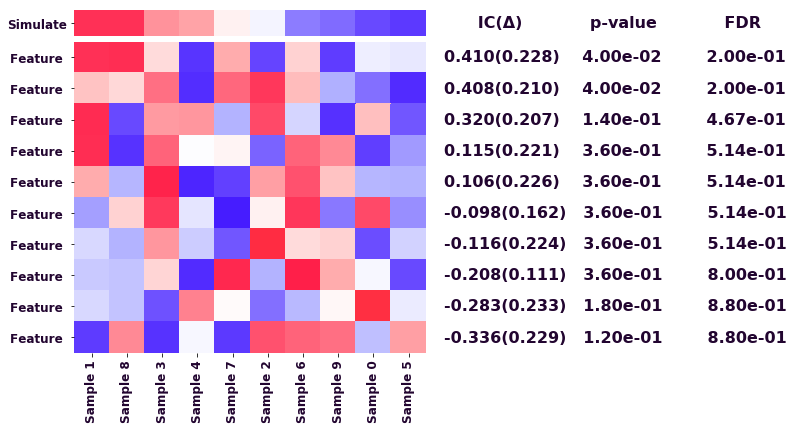

In [9]:
match_scores_for_continuous = make_match_panel(
    target,
    features_continuous,
    n_features=5,
    n_samplings=5,
    n_permutations=5,
    plot_sample_names=True)

In [10]:
target_str = pd.Series(
    ['T0'] * (n // 2) + ['T1'] * (n // 2), index=target.index)

target_str

Sample 0    T0
Sample 1    T0
Sample 2    T0
Sample 3    T0
Sample 4    T0
Sample 5    T1
Sample 6    T1
Sample 7    T1
Sample 8    T1
Sample 9    T1
dtype: object

/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


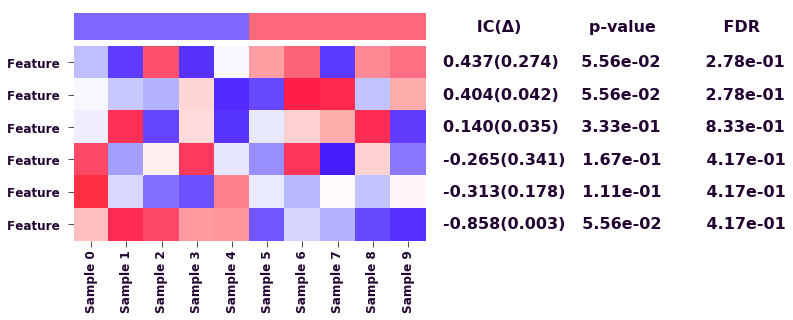

In [13]:
match_scores_for_continuous = make_match_panel(
    target_str,
    features_continuous,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    plot_sample_names=True)

In [ ]:
features_categorical = simulate_df(
    n * 2, n, 8, index_prefix='Feature ', column_prefix='Sample ')

features_categorical

In [ ]:
match_scores_for_categorical = make_match_panel(
    target,
    features_categorical,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    features_type='categorical',
    plot_sample_names=True)

In [ ]:
features_binary = simulate_df(
    n * 3, n, 2, index_prefix='Feature ', column_prefix='Sample ')

features_binary

In [ ]:
match_scores_for_binary = make_match_panel(
    target,
    features_binary,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    features_type='binary',
    plot_sample_names=True)

In [ ]:
features_with_missing = simulate_df(
    n * 3, n, index_prefix='Feature ', column_prefix='Sample ')

features_with_missing.loc[
    np.random.choice(features_with_missing.index, size=n // 3),
    np.random.choice(features_with_missing.columns, size=n // 3)] = None

features_with_missing

In [ ]:
from match.information.information.information import compute_information_coefficient

In [ ]:
compute_information_coefficient(np.array([0,0,0]), np.array([0,0,0]))

In [ ]:
match_scores_for_binary = make_match_panel(
    target,
    features_with_missing,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    features_type='binary',
    plot_sample_names=True)

In [ ]:
features = [
    [
        'Continuous features',
        features_continuous,
        ['Feature {}'.format(i) for i in range(n)],
        ['Alias {}'.format(i) for i in range(n)],
        None,  #match_scores_for_continuous,
        False,
        'continuous',
    ],
    [
        'Categorical features',
        features_categorical,
        ['Feature {}'.format(i) for i in range(n)],
        ['Alias {}'.format(i) for i in range(n)],
        None,  #match_scores_for_categorical,
        False,
        'categorical',
    ],
    [
        'Binary features',
        features_binary,
        ['Feature {}'.format(i) for i in range(n)],
        ['Alias {}'.format(i) for i in range(n)],
        None,  #match_scores_for_binary,
        False,
        'binary',
    ],
    [
        'Cntinuous features (scores ascending)',
        features_continuous.iloc[:, :-1],
        ['Feature {}'.format(i) for i in range(n)],
        ['Alias {}'.format(i) for i in range(n)],
        None,  #match_scores_for_continuous,
        True,
        'continuous',
    ],
]

In [ ]:
make_summary_match_panel(
    target, features, title='Default', plot_sample_names=True)

In [ ]:
make_summary_match_panel(
    target,
    features,
    plot_only_columns_shared_by_target_and_all_features=True,
    title='Only columns shared by target and all features',
    plot_sample_names=True)